<a href="https://colab.research.google.com/github/Aadityapritam/Covid_19_Xray_image_pediction/blob/master/covid19_Xray_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
# Data Augmentation to generate More Image
# from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array
# import matplotlib.pyplot as plt
# import os
# import cv2

# datagen=ImageDataGenerator(
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
#     )

# dirc='/content/drive/My Drive/Datasets/CovidDataset/Train/Covid/'
# img_path_covid=os.listdir('/content/drive/My Drive/Datasets/CovidDataset/Train/Covid/')
# for img in img_path_covid:
#   print(img)
#   img=cv2.imread(dirc+img)
#   img=img.reshape((1,)+ img.shape)
#   # plt.imshow(img)
#   # plt.show()
#   i=0
#   for batch in datagen.flow(img,batch_size=1, save_to_dir='/content/drive/My Drive/Datasets/CovidDataset/Train/Covid/gen_c/', save_prefix='covid',save_format='jpeg'):
#     i+=1
#     if(i>10):
#       break

# dirc='/content/drive/My Drive/Datasets/CovidDataset/Train/Normal/'
# img_path_covid=os.listdir('/content/drive/My Drive/Datasets/CovidDataset/Train/Normal/')
# for img in img_path_covid:
#   print(img)
#   img=cv2.imread(dirc+img)
#   img = np.array(img)
#   img=img.reshape((1,)+ img.shape)
#   # plt.imshow(img)
#   # plt.show()
#   i=0
#   for batch in datagen.flow(img,batch_size=1, save_to_dir='/content/drive/My Drive/Datasets/CovidDataset/Train/Normal/generated_img/', save_prefix='covid',save_format='jpeg'):
#     i+=1
#     if(i>10):
#       break


generated_img


ValueError: ignored

In [120]:
train_covid=os.listdir('/content/drive/My Drive/Datasets/CovidDataset/Train/Covid/')
train_normal=os.listdir('/content/drive/My Drive/Datasets/CovidDataset/Train/Normal/')
print('Train Covid Image:',len(train_covid))
print('Train Normal Image',len(train_normal))
val_covid=os.listdir('/content/drive/My Drive/Datasets/CovidDataset/Val/Covid/')
val_normal=os.listdir('/content/drive/My Drive/Datasets/CovidDataset/Val/Normal/')
print('Validation Covid_image:',len(val_covid))
print('Validation Normal Image:',len(val_normal))

Train Covid Image: 1138
Train Normal Image 803
Validation Covid_image: 146
Validation Normal Image: 147


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import keras
from keras.models import Model
from keras.preprocessing import image
from keras.layers import Input,Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.applications.imagenet_utils import preprocess_input

In [0]:
def creating_model(input_shape):
  x_input=Input(input_shape)
  mod=Conv2D(32,(3,3),strides=(1,1),activation='relu', name='conv1')(x_input)
  mod=Conv2D(64,(3,3),strides=(1,1),activation='relu',name='conv2')(mod)
  mod=MaxPooling2D((2,2),name='maxPooling1')(mod)
  mod=Dropout((0.5))(mod)

  mod=Conv2D(128,(3,3),strides=(1,1), activation='relu',name='conv3')(mod)
  mod=MaxPooling2D((2,2),name='maxPooling2')(mod)
  mod=Dropout((0.25))(mod)

  mod=Flatten()(mod)
  mod=Dense(64, activation='relu')(mod)
  mod=Dense(1,activation='sigmoid')(mod)

  model=Model(inputs=x_input, outputs=mod, name='covid-19_detection_model')

  return model

In [123]:
covid_model=creating_model((224,224,3))
covid_model.summary()

Model: "covid-19_detection_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 222, 222, 32)      896       
_________________________________________________________________
conv2 (Conv2D)               (None, 220, 220, 64)      18496     
_________________________________________________________________
maxPooling1 (MaxPooling2D)   (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv3 (Conv2D)               (None, 108, 108, 128)     73856     
_________________________________________________________________
maxPooling2 (MaxPooling2D)   (None, 54, 54

In [0]:
covid_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
train_datagen=image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
  )

test_dataset=image.ImageDataGenerator(rescale=1./255)


In [127]:
train_generator=train_datagen.flow_from_directory(
    '/content/drive/My Drive/Datasets/CovidDataset/Train',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary')

Found 2269 images belonging to 2 classes.


In [128]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [129]:
validation_generator=test_dataset.flow_from_directory(
    '/content/drive/My Drive/Datasets/CovidDataset/Val',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary')

Found 293 images belonging to 2 classes.


In [130]:
validation_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [132]:
hist=covid_model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=2,
    verbose=1
)

Epoch 1/10
8/8 [==============================] - 14s 2s/step - loss: 0.3813 - accuracy: 0.8047 - val_loss: 0.3294 - val_accuracy: 0.8594
Epoch 2/10
8/8 [==============================] - 9s 1s/step - loss: 0.4323 - accuracy: 0.8242 - val_loss: 0.3780 - val_accuracy: 0.8750
Epoch 3/10
8/8 [==============================] - 9s 1s/step - loss: 0.3699 - accuracy: 0.8340 - val_loss: 0.4028 - val_accuracy: 0.7656
Epoch 4/10
8/8 [==============================] - 8s 1s/step - loss: 0.4472 - accuracy: 0.7930 - val_loss: 0.5159 - val_accuracy: 0.8906
Epoch 5/10
8/8 [==============================] - 8s 1s/step - loss: 0.3797 - accuracy: 0.8633 - val_loss: 0.3337 - val_accuracy: 0.8919
Epoch 6/10
8/8 [==============================] - 15s 2s/step - loss: 0.3675 - accuracy: 0.8438 - val_loss: 0.4307 - val_accuracy: 0.8906
Epoch 7/10
8/8 [==============================] - 9s 1s/step - loss: 0.3699 - accuracy: 0.8711 - val_loss: 0.4509 - val_accuracy: 0.9219
Epoch 8/10
8/8 [=======================

In [0]:
covid_model.save("/content/covid_Xray_model.h5")

In [134]:
covid_model.evaluate_generator(train_generator)

[0.4642559885978699, 0.8624944686889648]

In [135]:
covid_model.evaluate_generator(validation_generator)

[0.544372022151947, 0.9078498482704163]

In [0]:
from keras import models
our_model=models.load_model('/content/covid_Xray_model.h5')

In [137]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [0]:
y_actual=[]
y_test=[]

In [0]:
val_norm_list=os.listdir('/content/drive/My Drive/Datasets/CovidDataset/Val/Normal/')
for i in val_norm_list:
  img=image.image.load_img("/content/drive/My Drive/Datasets/CovidDataset/Val/Normal/"+i, target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  res=our_model.predict(img)
  y_test.append(res[0,0])
  y_actual.append(1)

In [0]:
val_covid_list=os.listdir('/content/drive/My Drive/Datasets/CovidDataset/Val/Covid/')
for i in val_covid_list:
  img=image.image.load_img("/content/drive/My Drive/Datasets/CovidDataset/Val/Covid/"+i, target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  res=our_model.predict(img)
  y_test.append(res[0,0])
  y_actual.append(0)

In [0]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)

In [0]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_actual,y_test.round())

<module 'seaborn' from '/usr/local/lib/python3.6/dist-packages/seaborn/__init__.py'>
265


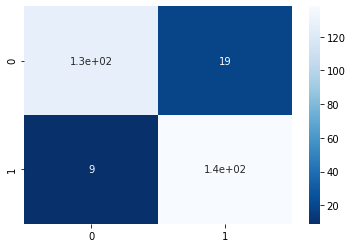

In [151]:
color=['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rai']
import seaborn as sn
sn.heatmap(cm, cmap=color[3], annot=True)
print(sn)
ac=accuracy_score(y_actual, y_test.round(), normalize=False)
print(ac)

In [0]:
#----------------------------------------------------- Vgg16 Model ---------------------------------------------------------------------

In [216]:
from keras.applications import vgg16
from keras.models import Model
import keras
input_shape=(224,224,3)
vgg = vgg16.VGG16(include_top=False, weights='imagenet', 
                                     input_shape=input_shape)

output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)

vgg_model = Model(vgg.input, output)
vgg_model.trainable = False

for layer in vgg_model.layers:
    layer.trainable = False

vgg_model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [217]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

model = Sequential()
model.add(vgg_model)
model.add(Dense(250, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_3 (Model)              (None, 25088)             14714688  
_________________________________________________________________
dense_13 (Dense)             (None, 250)               6272250   
_________________________________________________________________
dropout_11 (Dropout)         (None, 250)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 250)               62750     
_________________________________________________________________
dropout_12 (Dropout)         (None, 250)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 251       
Total params: 21,049,939
Trainable params: 6,335,251
Non-trainable params: 14,714,688
__________________________________

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
train_datagen=image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
  )

test_datagen=image.ImageDataGenerator(rescale=1./255)


In [220]:
train_generator=train_datagen.flow_from_directory(
    '/content/drive/My Drive/Datasets/CovidDataset/Train',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary')

validation_generator=test_datagen.flow_from_directory(
    '/content/drive/My Drive/Datasets/CovidDataset/Val',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary')


Found 2269 images belonging to 2 classes.
Found 293 images belonging to 2 classes.


In [221]:
hist=model.fit_generator(
    train_generator,
    steps_per_epoch=12,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=2,
    verbose=1
)

Epoch 1/10
12/12 [==============================] - 19s 2s/step - loss: 0.8108 - accuracy: 0.6772 - val_loss: 0.2260 - val_accuracy: 0.9375
Epoch 2/10
12/12 [==============================] - 13s 1s/step - loss: 0.2775 - accuracy: 0.8802 - val_loss: 0.0348 - val_accuracy: 0.9531
Epoch 3/10
12/12 [==============================] - 12s 1s/step - loss: 0.1623 - accuracy: 0.9375 - val_loss: 0.0367 - val_accuracy: 0.9531
Epoch 4/10
12/12 [==============================] - 13s 1s/step - loss: 0.1010 - accuracy: 0.9557 - val_loss: 0.0017 - val_accuracy: 0.9688
Epoch 5/10
12/12 [==============================] - 13s 1s/step - loss: 0.2746 - accuracy: 0.9115 - val_loss: 0.0216 - val_accuracy: 0.9730
Epoch 6/10
12/12 [==============================] - 18s 2s/step - loss: 0.1725 - accuracy: 0.9245 - val_loss: 0.0283 - val_accuracy: 0.9531
Epoch 7/10
12/12 [==============================] - 13s 1s/step - loss: 0.1227 - accuracy: 0.9449 - val_loss: 0.0682 - val_accuracy: 0.9688
Epoch 8/10
12/12 [==

In [0]:
y_test1=[]
y_actual1=[]

In [0]:

val_norm_list=os.listdir('/content/drive/My Drive/Datasets/CovidDataset/Val/Normal/')
for i in val_norm_list:
  img=image.image.load_img("/content/drive/My Drive/Datasets/CovidDataset/Val/Normal/"+i, target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  res=model.predict(img)
  y_test1.append(res[0,0])
  y_actual1.append(1)

In [0]:
val_covid_list=os.listdir('/content/drive/My Drive/Datasets/CovidDataset/Val/Covid/')
for i in val_covid_list:
  img=image.image.load_img("/content/drive/My Drive/Datasets/CovidDataset/Val/Covid/"+i, target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  res=model.predict(img)
  y_test1.append(res[0,0])
  y_actual1.append(0)

In [0]:
y_actual1=np.array(y_actual1)
y_test1=np.array(y_test1)

In [0]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_actual1,y_test1.round())

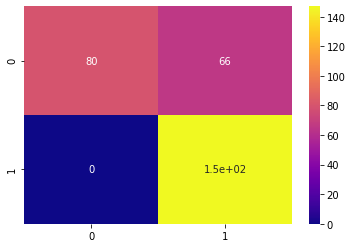

In [228]:
import seaborn as sn
sn.heatmap(cm1, cmap='plasma', annot=True)

In [178]:

history_dict = hist.history
print(history_dict.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


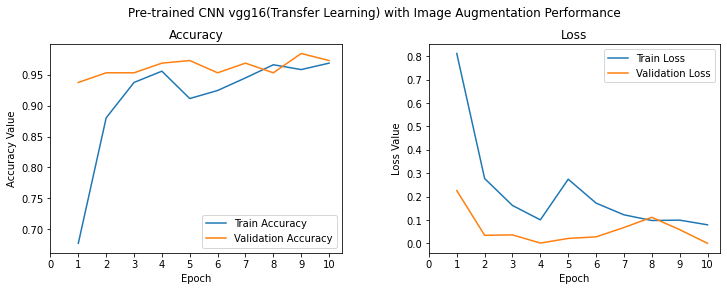

In [222]:

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Pre-trained CNN vgg16(Transfer Learning) with Image Augmentation Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,11))
ax1.plot(epoch_list, hist.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, hist.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 11, 1))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, hist.history['loss'], label='Train Loss')
ax2.plot(epoch_list, hist.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 11, 1))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [189]:
#InceptionV3
from keras.applications.inception_v3 import InceptionV3
from keras.models import Model
import keras
input_shape=(240,240,3)
inception = InceptionV3(include_top=False, weights='imagenet', 
                                     input_shape=input_shape)

output = inception.layers[-1].output
output = keras.layers.Flatten()(output)

inception_model = Model(inception.input, output)
inception_model.trainable = False

for layer in inception_model.layers:
    layer.trainable = False

inception_model.summary()

87916544/87910968 [==============================] - 1s 0us/step
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 240, 240, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 119, 119, 32) 864         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 119, 119, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 119, 119, 32) 0           batch_normalization_1[0][0]      
___________________________

In [190]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

model = Sequential()
model.add(inception_model)
model.add(Dense(250, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_2 (Model)              (None, 73728)             21802784  
_________________________________________________________________
dense_10 (Dense)             (None, 250)               18432250  
_________________________________________________________________
dropout_9 (Dropout)          (None, 250)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 250)               62750     
_________________________________________________________________
dropout_10 (Dropout)         (None, 250)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 251       
Total params: 40,298,035
Trainable params: 18,495,251
Non-trainable params: 21,802,784
_________________________________

In [0]:
train_datagen=image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
  )

test_datagen=image.ImageDataGenerator(rescale=1./255)


In [194]:
train_generator=train_datagen.flow_from_directory(
    '/content/drive/My Drive/Datasets/CovidDataset/Train',
    target_size=(240,240),
    batch_size=32,
    class_mode='binary')

validation_generator=test_datagen.flow_from_directory(
    '/content/drive/My Drive/Datasets/CovidDataset/Val',
    target_size=(240,240),
    batch_size=32,
    class_mode='binary')


Found 2269 images belonging to 2 classes.
Found 293 images belonging to 2 classes.


In [214]:
incp_hist=model.fit_generator(
    train_generator,
    steps_per_epoch=20,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=2,
    verbose=1
)

Epoch 1/5
20/20 [==============================] - 28s 1s/step - loss: 0.0942 - accuracy: 0.9608 - val_loss: 1.3678 - val_accuracy: 0.6875
Epoch 2/5
20/20 [==============================] - 22s 1s/step - loss: 0.0633 - accuracy: 0.9812 - val_loss: 0.0923 - val_accuracy: 0.9375
Epoch 3/5
20/20 [==============================] - 21s 1s/step - loss: 0.0751 - accuracy: 0.9750 - val_loss: 0.4509 - val_accuracy: 0.9219
Epoch 4/5
20/20 [==============================] - 22s 1s/step - loss: 0.0351 - accuracy: 0.9875 - val_loss: 1.7804 - val_accuracy: 0.5938
Epoch 5/5
20/20 [==============================] - 22s 1s/step - loss: 0.0487 - accuracy: 0.9766 - val_loss: 0.0032 - val_accuracy: 0.9730


In [206]:
history_dict = incp_hist.history
print(history_dict.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])
